In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("health care diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
# Replacing all the 0 values with null values

df.loc[:,"Pregnancies":"Age" ]=df.loc[:,"Pregnancies":"Age" ].replace(to_replace=0,value=np.nan)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [3]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
# Dropping rows which have more than 1 null value in each 9 element row in the DataFrame
df2=df
df2.dropna(thresh=8, inplace=True)
df2.isnull().sum()

Pregnancies                  56
Glucose                       1
BloodPressure                 0
SkinThickness                 0
Insulin                     119
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [200]:
df2.Outcome.value_counts()

0    343
1    169
Name: Outcome, dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')


In [10]:
# Filling in the remaining Null values by the mean

for column in df2.columns:
    df2[column]=imp.fit_transform(np.array(df2[column]).reshape(-1,1))
df2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.0,155.717557,33.6,0.627,50.0,1.0
1,1.000000,85.0,66.0,29.0,155.717557,26.6,0.351,31.0,0.0
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,4.105263,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1.0
6,3.000000,78.0,50.0,32.0,88.000000,31.0,0.248,26.0,1.0
...,...,...,...,...,...,...,...,...,...
761,9.000000,170.0,74.0,31.0,155.717557,44.0,0.403,43.0,1.0
763,10.000000,101.0,76.0,48.0,180.000000,32.9,0.171,63.0,0.0
764,2.000000,122.0,70.0,27.0,155.717557,36.8,0.340,27.0,0.0
765,5.000000,121.0,72.0,23.0,112.000000,26.2,0.245,30.0,0.0


In [6]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

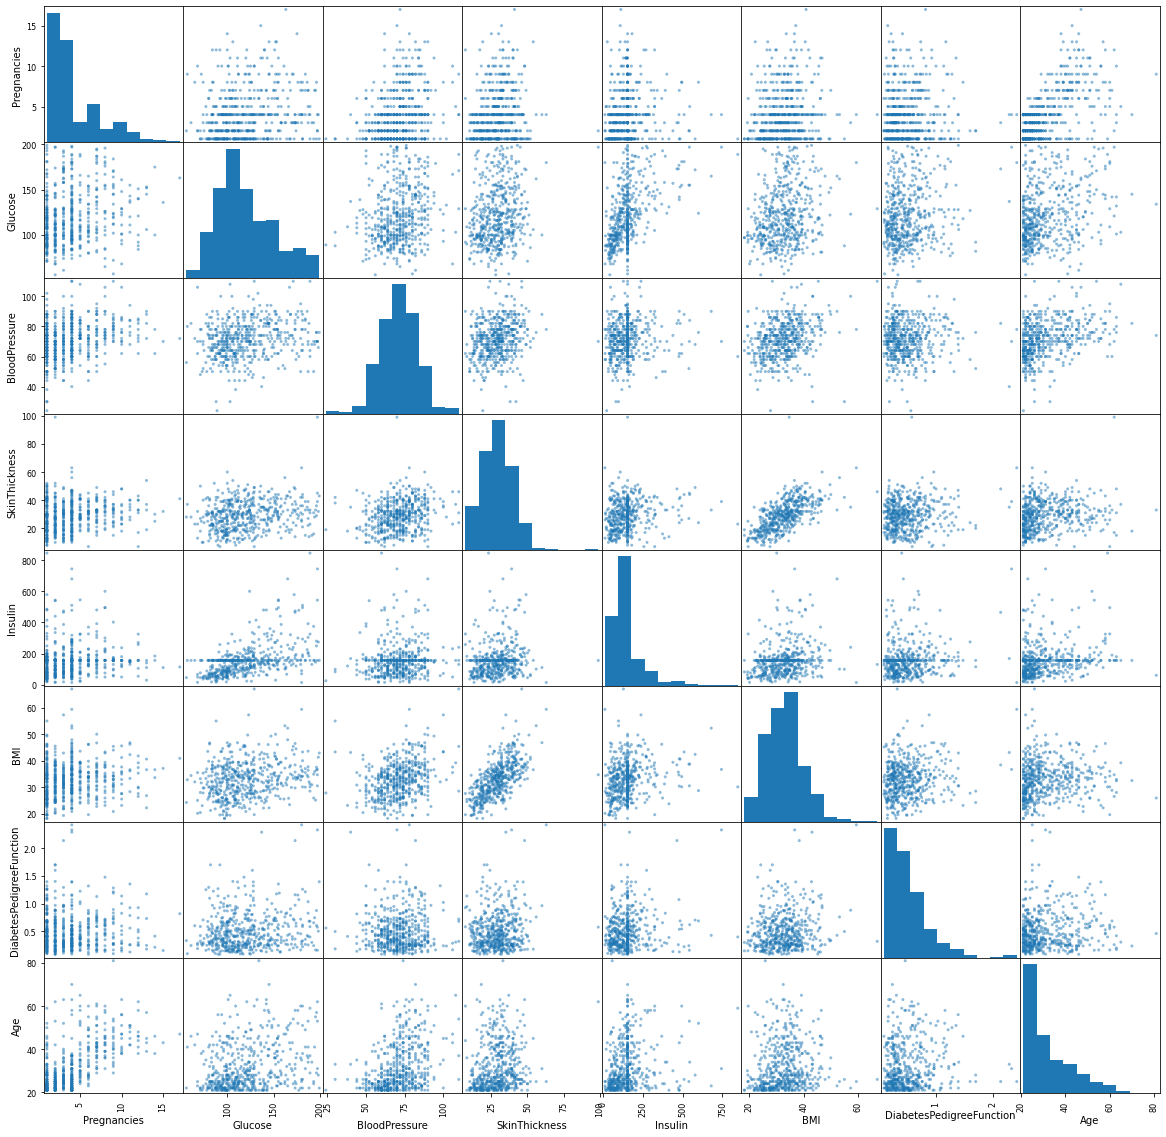

In [63]:
# plotting scatterplot

pd.plotting.scatter_matrix(df2.loc[:,"Pregnancies":"Age"],figsize=(20,20));

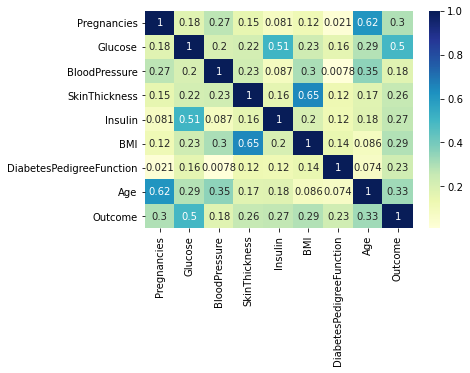

In [66]:
# plotting correlation heatmap

dataplot = sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
  

# From the above 2 plots it is evident that BMI-SkinThickness, Age-Pregnancies ,Insulin-Glucose have a high postive correlation.

In [11]:
x=df2.drop(columns="Outcome")
y=df2["Outcome"]
y

0      1.0
1      0.0
3      0.0
4      1.0
6      1.0
      ... 
761    1.0
763    0.0
764    0.0
765    0.0
767    0.0
Name: Outcome, Length: 512, dtype: float64

In [12]:
# Standaradzing The Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [44]:
print(x.shape, " ", y.shape)

(512, 8)   (512,)


In [48]:
y.value_counts()

0.0    343
1.0    169
Name: Outcome, dtype: int64

In [13]:
# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)

In [47]:
print(x_res.shape, " ", y_res.shape)

(686, 8)   (686,)


In [49]:
y_res.value_counts()

0.0    343
1.0    343
Name: Outcome, dtype: int64

In [14]:
# Performing Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.20, random_state=42)


In [15]:
# Model Building
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred_lr=LR.predict(x_test)
roc_auc_score(y_test, y_pred_lr)


0.7835616438356164

In [208]:
print (classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.75      0.80      0.78        65
         1.0       0.81      0.77      0.79        73

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.78      0.78      0.78       138



In [11]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)
y_pred_dt=DTC.predict(x_test)
roc_auc_score(y_test, y_pred_dt)


0.7912539515279241

In [210]:
print (classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74        65
         1.0       0.77      0.74      0.76        73

    accuracy                           0.75       138
   macro avg       0.75      0.75      0.75       138
weighted avg       0.75      0.75      0.75       138



In [12]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(x_train, y_train)
y_pred_xg=XGB.predict(x_test)
roc_auc_score(y_test, y_pred_xg)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8169652265542675

In [13]:
print (classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80        65
         1.0       0.82      0.85      0.83        73

    accuracy                           0.82       138
   macro avg       0.82      0.82      0.82       138
weighted avg       0.82      0.82      0.82       138



In [14]:
from sklearn.svm import SVC
SV=SVC()
SV.fit(x_train, y_train)
y_pred_sv=SV.predict(x_test)
roc_auc_score(y_test, y_pred_sv)

0.7870389884088516

In [214]:
print (classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77        65
         1.0       0.78      0.84      0.81        73

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138



In [15]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_rf=RF.predict(x_test)

roc_auc_score(y_test, y_pred_rf)

0.8400421496311905

In [216]:
print (classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        65
         1.0       0.84      0.86      0.85        73

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138



In [24]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred_kn=KNN.predict(x_test)
roc_auc_score(y_test, y_pred_kn)

In [218]:
print (classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

         0.0       0.83      0.69      0.76        65
         1.0       0.76      0.88      0.82        73

    accuracy                           0.79       138
   macro avg       0.80      0.78      0.79       138
weighted avg       0.80      0.79      0.79       138



Random Forest gives the best accuracy

In [17]:
# Performing Hyperparameter tuning on RF to optimize the result

from sklearn.model_selection import GridSearchCV
parameters={'n_estimators': [i for i in range(100,200, 10)],"max_depth":[i for i in range(10,200,10)]}
clf = GridSearchCV(RF, parameters,cv=10)
clf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 120, 130, 140, 150, 160, 170, 180,
                                       190],
                         'n_estimators': [100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190]})

In [18]:
clf.best_params_

{'max_depth': 30, 'n_estimators': 150}

In [19]:
clf.best_score_

0.8505050505050505

In [20]:
analyze= pd.DataFrame(clf.cv_results_)
analyze=analyze[["param_n_estimators","param_max_depth","mean_test_score"]]
analyze.sort_values(by=["mean_test_score"],axis=0,ascending=False).head(5)

,param_n_estimators,param_max_depth,mean_test_score
25,150,30,0.850505
184,140,190,0.850438
134,140,140,0.848687
157,170,160,0.848653
146,160,150,0.848653


In [21]:
y_pred_clf= clf.predict(x_test)
roc_auc_score(y_test, y_pred_clf)

0.8537407797681769

In [27]:
print (classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

         0.0       0.96      0.74      0.83        65
         1.0       0.81      0.97      0.88        73

    accuracy                           0.86       138
   macro avg       0.88      0.86      0.86       138
weighted avg       0.88      0.86      0.86       138



In [28]:
# Performing Hyperparameter tuning on RF to try optimize the result and compare with optimized RF

error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

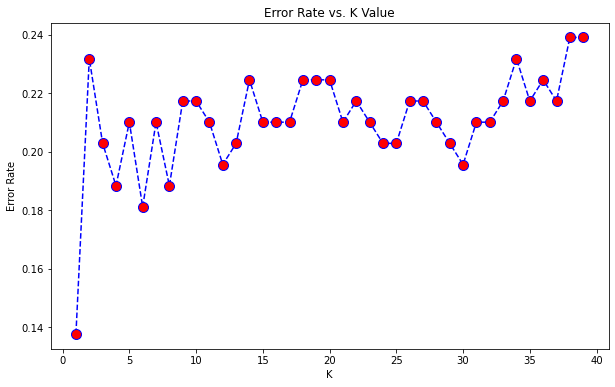

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train, y_train)
y_pred_kn=KNN.predict(x_test)
roc_auc_score(y_test, y_pred_kn)

0.855532139093783

Paramater Hypertuning has improved the scores in both Random forest and KNN.
KNN seems to outperform Random Forest by a small margin post Hypertuning.